# Web-scraping z Beautifulsoup


#### Źródło: https://www.dataquest.io/blog/web-scraping-python-using-beautiful-soup/

#### Przydatne materiały:

- https://www.dataquest.io/blog/web-scraping-python-using-beautiful-soup/


- Paweł Baranowski Wirginia Doryń: PRZETWARZANIE DANYCH I UCZENIE MASZYNOWE W JĘZYKU PYTHON. APLIKACJE W EKONOMII I ZARZĄDZANIU, Instytut Badań Gospodarczych, Olsztyn 2020, DOI: https://doi.org/10.24136/eep.mon.2020.1

- Ryan Mitchell: Web Scraping with Python, Collecting More Data from the Modern Web, O'Reilly, 2018



### Podstawy HTML
Gdy odwiedzamy stronę internetową, nasza przeglądarka wysyła żądanie do serwera WWW. Żądanie to jest nazywane żądaniem GET, ponieważ pobieramy pliki z serwera. Serwer odsyła pliki, które informują przeglądarkę, w jaki sposób ma renderować daną stronę. Pliki te zazwyczaj zawierają:

- HTML - główną treść strony.
- CSS - używane do dodawania stylizacji, aby strona wyglądała ładniej.
- JS - pliki Javascript dodają interaktywność do stron internetowych.
- Obrazy - formaty obrazów, takie jak JPG i PNG, umożliwiają wyświetlanie obrazów na stronach internetowych.

Gdy przeglądarka otrzyma wszystkie pliki, renderuje stronę i wyświetla ją.

Aby strona była ładnie wyrenderowana, wiele dzieje się za kulisami, ale nie musimy się o to martwić, gdy zajmujemy się web-scrapingem. Podczas scrapingu interesuje nas przede wszystkim główna zawartość strony, a więc przede wszystkim HTML.


HyperText Markup Language (HTML) to język, w którym tworzone są strony WWW. HTML nie jest językiem programowania, tak jak Python. Jest to język znaczników, który mówi przeglądarce, jak ma wyświetlać zawartość. Język HTML ma wiele funkcji podobnych do tych, które można znaleźć w edytorze tekstu, takim jak Microsoft Word - można w nim pogrubiać tekst, tworzyć akapity itd.

Język HTML składa się z elementów zwanych znacznikiami (tagi). Najbardziej podstawowym znacznikiem jest znacznik ```<html>```. Ten znacznik informuje przeglądarkę internetową, że wszystko, co się w nim znajduje, to HTML. Przykładowy skrypt HTML:


<html>
<head>
</head>
<body>
<p>
Here's a paragraph of text!
</p>
<p>
Here's a second paragraph of text!
</p>
</body>
</html>

```
<html>
<head>
</head>
<body>
<p>
Here's a paragraph of text!
</p>
<p>
Here's a second paragraph of text!
</p>
</body>
</html>
```

W języku HTML tagi są zagnieżdżone i mogą znajdować się wewnątrz innych tagów.
Główna treść strony internetowej jest umieszczana w ```<body>```. ```<head>``` zawiera dane o tytule strony oraz inne informacje, które na ogół nie są przydatne w scrapingu. ```<p>``` definiuje akapit, a każdy tekst znajdujący się wewnątrz tego taga jest wyświetlany jako osobny akapit. Po uruchomieniu kodu dostaniemy: 




<html>
<head>
</head>
<body>
<p>
Here's a paragraph of text!
</p>
<p>
Here's a second paragraph of text!
</p>
</body>
</html>


Tagi mają powszechnie stosowane nazwy, które zależą od ich położenia w stosunku do innych znaczników:

- child - child to znacznik znajdujący się wewnątrz innego taga. Tak więc dwa powyższe tagi ```<p>``` są dziećmi ```<body>```.
- parent - rodzic to znacznik, wewnątrz którego znajduje się inny znacznik. Powyżej znacznik ```<html>``` jest rodzicem znacznika ```<body>```.
- sibling - rodzeństwo to znacznik, który jest zagnieżdżony wewnątrz tego samego rodzica co inny znacznik. Na przykład znaczniki ```<head>``` i ```<body>``` są rodzeństwem, ponieważ oba znajdują się wewnątrz html. Oba znaczniki ```<p>``` są rodzeństwem, ponieważ oba znajdują się wewnątrz ```<body>```.


```
<html>
<head>
</head>
<body>
<p>
Here's a paragraph of text!
<a href="https://www.dataquest.io">Learn Data Science Online</a>
</p>
<p>
Here's a second paragraph of text!
<a href="https://www.python.org">Python</a> </p>
</body></html>
```

<html>
<head>
</head>
<body>
<p>
Here's a paragraph of text!
<a href="https://www.dataquest.io">Learn Data Science Online</a>
</p>
<p>
Here's a second paragraph of text!
<a href="https://www.python.org">Python</a> </p>
</body></html>

W powyższym przykładzie dodaliśmy dwa znaczniki ```<a>```. Znaczniki ```<a>``` są łączami i informują przeglądarkę, że mają renderować link do innej strony internetowej. Właściwość ```<href>``` znacznika określa, dokąd ma prowadzić link.

Znaczniki ```<a>```i ```<p>``` są bardzo popularnymi znacznikami html. Oto kilka innych:

- div - wskazuje na podział lub obszar strony.
- b - pogrubia dowolny tekst znajdujący się w środku.
- i - kursywuje dowolny tekst w środku.
- table - tworzy tabelę.
- form - tworzy formularz wejściowy.

Zanim przejdziemy do właściwego scrapowania stron internetowych, zapoznajmy się z właściwościami ```class``` oraz ```id```. Te specjalne właściwości nadają elementom HTML nazwy i ułatwiają interakcję z nimi podczas scrapowania.

Jeden element może mieć wiele klas, a klasa może być współdzielona między elementami. Każdy element może mieć tylko jedno ```id```, a ```id``` może być użyte tylko raz na stronie. Klasy oraz identyfikatory są opcjonalne i nie wszystkie elementy będą je posiadały.

Do naszego przykładu możemy dodać klasy oraz identyfikatory:


```
<html>
<head>
</head>
<body>
<p class="bold-paragraph">
Here's a paragraph of text!
<a href="https://www.dataquest.io" id="learn-link">Learn Data Science Online</a>
</p>
<p class="bold-paragraph extra-large">
Here's a second paragraph of text!
<a href="https://www.python.org" class="extra-large">Python</a>
</p>
</body>
</html>
```


<html>
<head>
</head>
<body>
<p class="bold-paragraph">
Here's a paragraph of text!
<a href="https://www.dataquest.io" id="learn-link">Learn Data Science Online</a>
</p>
<p class="bold-paragraph extra-large">
Here's a second paragraph of text!
<a href="https://www.python.org" class="extra-large">Python</a>
</p>
</body>
</html>


 ### Pobieranie stron HTML

Teraz, gdy rozumiemy już strukturę strony internetowej, czas przejść do właściwej części zabawy: scrapowania potrzebnej nam zawartości!
Pierwszą rzeczą, jaką będziemy musieli zrobić, aby zescrapować zawartość strony internetowej, jest jej pobranie. Strony możemy pobierać za pomocą biblioteki Pythona requests.

Biblioteka requests wykona żądanie GET do serwera WWW, który pobierze dla nas zawartość HTML danej strony internetowej. Istnieje kilka różnych typów żądań, które możemy wykonać za pomocą requestów, z których GET jest tylko jednym.

Spróbujmy pobrać prostą, przykładową witrynę https://dataquestio.github.io/web-scraping-pages/simple.html.

In [ ]:
#!pip list
# %pip install requests
#%pip install beautifulsoup4
#%pip install pandas

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
page = requests.get("https://dataquestio.github.io/web-scraping-pages/simple.html")
page

In [ ]:
page.status_code

In [ ]:
page.content

### Poruszanie się w HTML

Możemy użyć biblioteki BeautifulSoup do przetworzenia tego dokumentu i wyodrębnienia tekstu z tagu ```<p>```.

Najpierw musimy zaimportować bibliotekę i utworzyć instancję klasy BeautifulSoup, która będzie przetwarzać nasz dokument:

In [ ]:
soup = BeautifulSoup(page.content, 'html.parser')

In [ ]:
soup

In [ ]:
print(soup.prettify())

### Znalezienie tagów z BS

Jeśli chcemy wyodrębnić pojedynczy znacznik, możemy użyć metody *find_all*, która znajdzie wszystkie przypadki danego znacznika na stronie.

In [ ]:
soup.find_all('p')

In [ ]:
soup.find_all('p')[0].get_text()


Jeśli zamiast tego chcesz znaleźć tylko pierwszą instancję znacznika, możesz użyć metody find, która zwróci pojedynczy obiekt BeautifulSoup:



In [ ]:
soup.find('p').get_text()


In [ ]:
page = requests.get("https://dataquestio.github.io/web-scraping-pages/ids_and_classes.html")
soup = BeautifulSoup(page.content, 'html.parser')
soup

Teraz możemy użyć metody find_all, aby wyszukać elementy według klasy lub id. W poniższym przykładzie wyszukamy każdy znacznik p, który ma klasę outer-text:

In [ ]:
soup.find_all('p', class_='outer-text')

In [ ]:
soup.find_all(class_="outer-text")

In [ ]:
soup.find_all(id="first")

### Zadanie

1. Znajdź tag "title" i wybierz dane tekstowe
2. Znajdź 1. tag z klasą "inner-text" i wybierz dane tekstowe
3. Znajdź 2. tag z klasą "inner-text" i wybierz dane tekstowe
4.  Znajdź tag z id "second" i wybierz dane tekstowe

### Selektory CSS

Możemy również wyszukiwać elementy za pomocą selektorów CSS. Selektory są sposobem, w jaki język CSS umożliwia programistom określanie znaczników HTML do stylizacji. Oto kilka przykładów:

- p a - wyszukuje wszystkie znaczniki ```a``` wewnątrz znacznika ```p```.
- body p a - znajduje wszystkie znaczniki ```a``` wewnątrz znacznika ```p``` wewnątrz znacznika ```body```.
- html body - znajduje wszystkie znaczniki ```body``` wewnątrz znacznika ```html```.
- p.outer-text - znajduje wszystkie znaczniki ```p``` z klasą ```outer-text```.
- p#first - znajduje wszystkie znaczniki ```p``` o ```id``` równym first.
- body p.outer-text - znajduje wszystkie znaczniki ```p``` z klasą ```outer-text``` wewnątrz znacznika body.

Obiekty BeautifulSoup obsługują wyszukiwanie strony za pomocą selektorów CSS przy użyciu metody select. Możemy użyć selektorów CSS, aby znaleźć wszystkie znaczniki p na naszej stronie, które znajdują się wewnątrz div, jak poniżej:



In [ ]:
soup.select("div p")

### Zadanie

1. Znajdź tagi ```b``` wewnątrz ```p```
2. Znajdź tagi ```p``` z klasą ```inner-text```
3. Znajdź tagi ```p``` z id ```first```


### Prosty scraper

Przygotujmy scraper, który pozbiera informacje ze strony: https://forecast.weather.gov/MapClick.php?lat=37.7772&lon=-122.4168.

Jako wynik końcowy przygotujmy df, który zawiera informacje z tabelki poniżej:


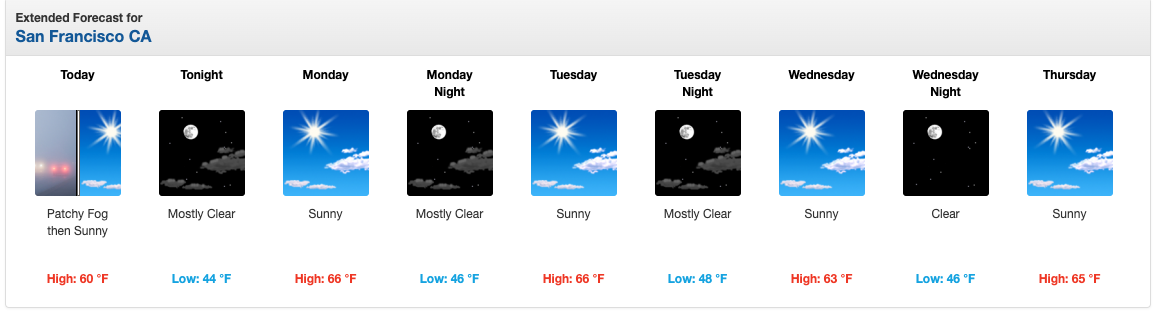

In [ ]:
page = requests.get("https://forecast.weather.gov/MapClick.php?lat=37.7772&lon=-122.4168")
soup = BeautifulSoup(page.content, 'html.parser')



In [ ]:
#soup

In [ ]:
table=soup.find(id='seven-day-forecast-container')

In [ ]:
#table

In [ ]:
items=table.find_all(class_='forecast-tombstone')

In [ ]:
items[0]

In [ ]:
len(items)

In [ ]:
items

In [ ]:
days=[]
descriptions=[]
temperatures=[]
for i in items[1:]:
    day=i.find(class_='period-name').get_text()
    days.append(day)
    description=i.find(class_='short-desc').get_text()
    descriptions.append(description)
    temperature=i.find(class_='temp').get_text()
    temperatures.append(temperature)
    
    
    
    
    

In [ ]:
days

In [ ]:
descriptions

In [ ]:
temperatures

In [ ]:
weather = pd.DataFrame({
    "days": days,
    "descriptions": descriptions,
    "temp": temperatures,
})
weather

In [ ]:
weather=[]
for i in items:
    day=i.find(class_='period-name').get_text()
    description=i.find(class_='short-desc').get_text()
    temperature=i.find(class_='temp').get_text()
    
    weather.append({
    "days": day,
    "descriptions": description,
    "temp": temperature,
})
    
    

In [ ]:
weather

In [ ]:
pd.DataFrame(weather)

### Zadanie

Przygotuj scraper do strony: https://gratka.pl/motoryzacja/osobowe
Przygotuj dataframe, który zawiera dla każdej oferty:
- Lokalizację
- Dane z tabeli (na razie jako jedna zmienna tekstowa)
- Cena
- Tytuł 

ostatni element jest atrybutem - możemy wyciągnąć wartość podobnie jak z słownika, 

np. ```find('a')['title']```
